In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser
import seaborn as sns
from IPython.display import Image
import os
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from math import sqrt
from sklearn import linear_model
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import pipeline, preprocessing, neighbors, model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


/Users/justinblinder/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
def fin():
    os.system("play ~/dev/metis/tmp/goat.mp3")

In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('display.precision', 3)

In [5]:
# Load cleaned dataset
df_pluto = pd.read_pickle('../data/pkl/df_pluto-cat-feat-2013-2017.pkl')

# Create holdout set of current vacant lots that are in specific zip code
#df_pluto_holdout = df_pluto[(df_pluto['LandUse']==11)&(df_pluto['PolicePrct_75.0'] == 1)]

# Remove columns from train/test set
df_pluto = df_pluto[df_pluto.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]
df_pluto = df_pluto[df_pluto.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]
df_pluto = df_pluto[df_pluto.columns.difference(['new_bldg_prob','ZoneCodeChanged','LandUse','LandUse2016','ZoneCodeBecameCondo'])]
df_pluto = df_pluto[df_pluto.columns.difference(['Cat_LandUse2016_11.0','Cat_LandUse2016_10.0','Cat_LandUse2016_9.0','Cat_LandUse2016_8.0','Cat_LandUse2016_7.0','Cat_LandUse2016_6.0','Cat_LandUse2016_5.0','Cat_LandUse2016_4.0','Cat_LandUse2016_3.0','Cat_LandUse2016_2.0','Cat_LandUse2016_1.0'])]
df_pluto = df_pluto.dropna()

# Not great, but prevents overwriting land use with all properties when filtering based on orginal dataframe
'''
df_pluto_holdout = df_pluto_holdout[df_pluto_holdout.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]
df_pluto_holdout = df_pluto_holdout[df_pluto_holdout.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]
df_pluto_holdout = df_pluto_holdout[df_pluto_holdout.columns.difference(['new_bldg_prob','ZoneCodeChanged','LandUse','LandUse2016','ZoneCodeBecameCondo'])]
df_pluto_holdout = df_pluto_holdout[df_pluto_holdout.columns.difference(['LandUse2016_11.0','LandUse2016_10.0','LandUse2016_9.0','LandUse2016_8.0','LandUse2016_7.0','LandUse2016_6.0','LandUse2016_5.0','LandUse2016_4.0','LandUse2016_3.0','LandUse2016_2.0','LandUse2016_1.0'])]
df_pluto_holdout = df_pluto_holdout.dropna()
df_pluto_holdout_ref = df_pluto_holdout

# Subset holdout from cleaned dataset and remove zipcode from train/test set
#df_pluto_holdout = df_pluto[(df_pluto['ZipCode_11211.0'] == 1)]
#df = df.drop(df[df.score < 50].index)
df_pluto =df_pluto.drop(df_pluto[df_pluto['PolicePrct_75.0'] == 1].index)
#df_pluto[df_pluto'ZipCode_11211.0' == 1]

# Remove zone code vacant from holdout set
df_pluto_holdout = df_pluto_holdout[df_pluto_holdout.columns.difference(['ZoneCodeWasVacant'])]
df_pluto_holdout
'''

"\ndf_pluto_holdout = df_pluto_holdout[df_pluto_holdout.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]\ndf_pluto_holdout = df_pluto_holdout[df_pluto_holdout.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]\ndf_pluto_holdout = df_pluto_holdout[df_pluto_holdout.columns.difference(['new_bldg_prob','ZoneCodeChanged','LandUse','LandUse2016','ZoneCodeBecameCondo'])]\ndf_pluto_holdout = df_pluto_holdout[df_pluto_holdout.columns.difference(['LandUse2016_11.0','LandUse2016_10.0','LandUse2016_9.0','LandUse2016_8.0','LandUse2016_7.0','LandUse2016_6.0','LandUse2016_5.0','LandUse2016_4.0','LandUse2016_3.0','LandUse2016_2.0','LandUse2016_1.0'])]\ndf_pluto_holdout = df_pluto_holdout.dropna()\ndf_pluto_holdout_ref = df_pluto_holdout\n\n# Subset holdout from cleaned dataset and remove zipcode from train/test set\n#df_pluto_holdout = df_pluto[(df_pluto['ZipCode_11211.0'] == 1)]\n#df = df.drop(df[df.score < 50].index)\ndf_pluto

In [205]:
'''
# LEGACY
# Load cleaned dataset
df_pluto = pd.read_pickle('../data/pkl/df_pluto-cat-feat-2013-2017.pkl')

# Create holdout set of current vacant lots that are in specific zip code
df_pluto_holdout = df_pluto[(df_pluto['LandUse']==11)]

# Remove columns from train/test set
df_pluto = df_pluto[df_pluto.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]
df_pluto = df_pluto[df_pluto.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]
df_pluto = df_pluto[df_pluto.columns.difference(['new_bldg_prob','ZoneCodeChanged','LandUse','LandUse2016','ZoneCodeBecameCondo'])]
df_pluto = df_pluto[df_pluto.columns.difference(['LandUse2016_11.0','LandUse2016_10.0','LandUse2016_9.0','LandUse2016_8.0','LandUse2016_7.0','LandUse2016_6.0','LandUse2016_5.0','LandUse2016_4.0','LandUse2016_3.0','LandUse2016_2.0','LandUse2016_1.0'])]
df_pluto = df_pluto.dropna()

# Subset holdout from cleaned dataset and remove zipcode from train/test set
df_pluto_holdout = df_pluto[(df_pluto['Block']==198) &(df_pluto['Lot']==47)]
#df = df.drop(df[df.score < 50].index)
df_pluto =df_pluto.drop(df_pluto[df_pluto['ZipCode_11211.0'] == 1].index)
#df_pluto[df_pluto'ZipCode_11211.0' == 1]

# Remove zone code vacant from holdout set
df_pluto_holdout = df_pluto_holdout[df_pluto_holdout.columns.difference(['ZoneCodeWasVacant'])]
'''

"\n# LEGACY\n# Load cleaned dataset\ndf_pluto = pd.read_pickle('../data/pkl/df_pluto-cat-feat-2013-2017.pkl')\n\n# Create holdout set of current vacant lots that are in specific zip code\ndf_pluto_holdout = df_pluto[(df_pluto['LandUse']==11)]\n\n# Remove columns from train/test set\ndf_pluto = df_pluto[df_pluto.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]\ndf_pluto = df_pluto[df_pluto.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]\ndf_pluto = df_pluto[df_pluto.columns.difference(['new_bldg_prob','ZoneCodeChanged','LandUse','LandUse2016','ZoneCodeBecameCondo'])]\ndf_pluto = df_pluto[df_pluto.columns.difference(['LandUse2016_11.0','LandUse2016_10.0','LandUse2016_9.0','LandUse2016_8.0','LandUse2016_7.0','LandUse2016_6.0','LandUse2016_5.0','LandUse2016_4.0','LandUse2016_3.0','LandUse2016_2.0','LandUse2016_1.0'])]\ndf_pluto = df_pluto.dropna()\n\n# Subset holdout from cleaned dataset and remove zipcode from tr

In [6]:
from imblearn.over_sampling import SMOTE 

# Subset data
df_pluto_subset = df_pluto

# Get coefs
y = df_pluto_subset['ZoneCodeWasVacant'].astype(int)
X = df_pluto_subset[df_pluto_subset.columns.difference(['ZoneCodeWasVacant'])]

# Create test train split
xtrain, xtest, ytrain, ytest= train_test_split(X,y)

# Smote train/ test data
sm = SMOTE(random_state=42)
xtrain, ytrain = sm.fit_sample(xtrain,ytrain)

In [7]:
# Scale train/test/holdout values values
scaler = StandardScaler().fit(xtrain)
xtrain_s = scaler.transform(xtrain)
xtest_s = pd.DataFrame(scaler.transform(xtest))

#df_pluto_holdout = pd.DataFrame(scaler.transform(df_pluto_holdout))

In [37]:
'''
# Fit, score and save logistic model
import pickle
logreg = LogisticRegression(C=1e9)
logreg.fit(xtrain_s, ytrain)
outcome_pred_class_log = logreg.predict(X)
pickle.dump(logreg, open('../data/pkl/logreg-alldata-final-limit_coefs.pkl', 'wb'))
'''

In [ ]:
import pickle
with open(r"../data/pkl/logreg-alldata-final.pkl", "rb") as input_file:
    logreg = pickle.load(input_file)

## Logistic Regression

In [43]:
test_score = logreg.score(xtest_s,ytest)
train_score = logreg.score(xtrain_s,ytrain)

print(f'test: {test_score} train: {train_score}')

y_pred = logreg.predict(xtest_s)
print(classification_report(ytest,y_pred,target_names=["Vacant Remains","Vacant Changes"]))


test: 0.8268925357331922 train: 0.8534687112702378
                precision    recall  f1-score   support

Vacant Remains       1.00      0.83      0.90     67789
Vacant Changes       0.01      0.82      0.03       215

   avg / total       1.00      0.83      0.90     68004



In [41]:
# Predict all holdout rows and merge onto holdout dataframe

y_pred = logreg.predict_proba(df_pluto_holdout)
#df_pluto_holdout_ref = df_pluto_holdout_ref.reset_index()
df_pluto_holdout_ref = pd.merge(df_pluto_holdout_ref,pd.DataFrame(y_pred),how='outer', left_index=True, right_index=True)
df_pluto_holdout_ref['VacantNo'] = df_pluto_holdout_ref['1_x']
df_pluto_holdout_ref['VacantYes'] = df_pluto_holdout_ref['0_x']
df_pluto_holdout_ref

ValueError: X has 265 features per sample; expecting 147

In [200]:
# Save holdout set (with probabilities)
pickle.dump(df_pluto_holdout_ref, open('../data/pkl/holdout_Precinct_75.pkl', 'wb'))

In [196]:
# Save logistic regression model
'''
import pickle
pickle.dump(logreg, open('../data/pkl/logreg-alldata-final.pkl', 'wb'))
'''

True Positives: 176
True Negatives: 56056
False Positives: 11733
False Negatives: 39


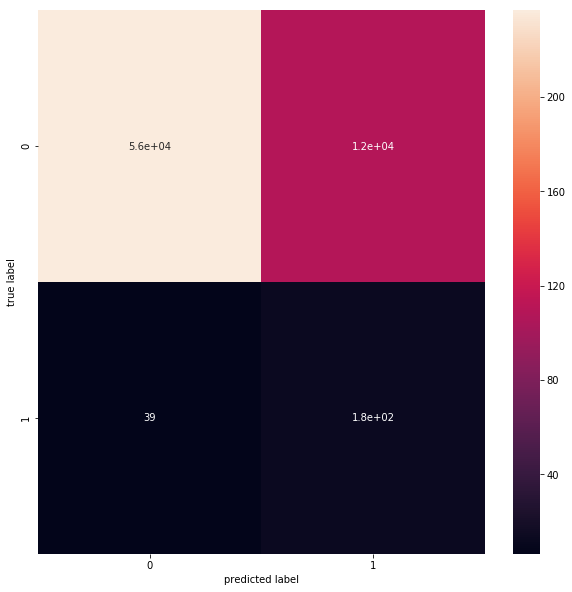

In [44]:
tn,  fp,  fn,  tp  =  metrics.confusion_matrix(ytest,logreg.predict(xtest_s)).ravel()
print('True Positives: ' + str(tp))
print('True Negatives: ' + str(tn))
print('False Positives: ' + str(fp))
print('False Negatives: ' + str(fn))
def plot_confusion(clf, x, y):
    fig = plt.figure(figsize=(10,10))
    y_pred = clf.predict(x)
    c_mat = metrics.confusion_matrix(y,y_pred)
    labels = np.unique(y)
    sns.heatmap(
        np.sqrt(c_mat),
        annot=c_mat,
        xticklabels=labels,
        yticklabels=labels,
        cbar=True);
    plt.ylabel("true label")
    plt.xlabel("predicted label")
    
plot_confusion(logreg,xtest_s,ytest)

In [61]:
# Print feature importance
feature_importance = list(zip(X.columns, logreg.coef_[0]))
feature_importance.sort(key=lambda x: abs(x[1]))
best = pd.DataFrame(feature_importance,columns=["Feature",'Importance'])[::-1]
filter_cols = best[:20]['Feature'].values


In [ ]:
plt.figure(num=None, figsize=(25, 20), dpi=500, facecolor='w', edgecolor='k')
plt.bar(best['Feature'],best['Importance'])

## Confusion Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a8ac550>]],
      dtype=object)

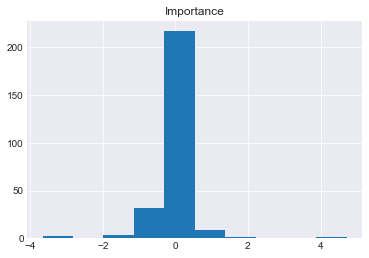

# Random Forrests

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(xtrain_s,ytrain)
y_pred = rf.predict(xtest_s)

print("Test set accuracy: ", accuracy_score(ytest,y_pred))
print("Classification Report:\n", metrics.classification_report(ytest,y_pred))

Test set accuracy:  0.9975736721369332
Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     67789
          1       0.70      0.40      0.51       215

avg / total       1.00      1.00      1.00     68004



In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfs = RandomForestClassifier(n_estimators = 100)
rfs.fit(xtrain_s,ytrain)
y_pred = rfs.predict(xtest_s)

test_score = rf.score(xtest_s,ytest)
train_score = rf.score(xtrain_s,ytrain)

print(f'test: {test_score} train: {train_score}')


print("Test set accuracy: ", accuracy_score(ytest,y_pred))
print("Classification Report:\n", metrics.classification_report(ytest,y_pred))

test: 0.9968384212693371 train: 0.5000147541951094
Test set accuracy:  0.9976766072583966
Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     67789
          1       0.74      0.41      0.53       215

avg / total       1.00      1.00      1.00     68004



In [106]:
import pickle
pickle.dump(rfs, open('../data/pkl/rf-alldata-final-scaled.pkl', 'wb'))
rf = rfs

In [137]:
In [25]: pd.set_option('display.float_format', lambda x: '%.3f' % x)
feature_importance = pd.DataFrame({'Features':X.columns, "Important":rf.feature_importances_}).sort_values(by='Important',ascending=False)
feature_importance['Important'] = feature_importance['Important']
rf_features = feature_importance['Features'][:22].values

True Positives: 89
True Negatives: 67757
False Positives: 32
False Negatives: 126


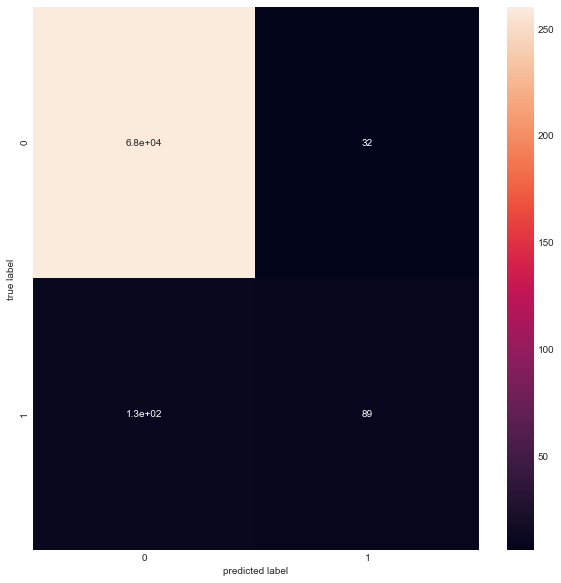

In [131]:
def plot_confusion(clf, x, y):
    tn,  fp,  fn,  tp  =  metrics.confusion_matrix(y,clf.predict(x)).ravel()
    print('True Positives: ' + str(tp))
    print('True Negatives: ' + str(tn))
    print('False Positives: ' + str(fp))
    print('False Negatives: ' + str(fn))
    fig = plt.figure(figsize=(10,10))
    y_pred = clf.predict(x)
    c_mat = metrics.confusion_matrix(y,y_pred)
    labels = np.unique(y)
    sns.heatmap(
        np.sqrt(c_mat),
        annot=c_mat,
        xticklabels=labels,
        yticklabels=labels,
        cbar=True);
    plt.ylabel("true label")
    plt.xlabel("predicted label")
    
plot_confusion(rf,xtest_s,ytest)

# Plot ROC/AUC

Text(0,0.5,'True Positive Rate (Sensitivity)')

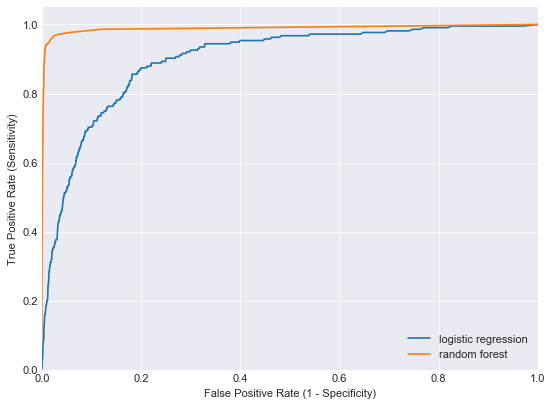

In [130]:
import seaborn as sns
sns.set_style("darkgrid")
predicted_probs_lr = logreg.predict_proba(xtest_s).round(3)
predictions_lr = logreg.predict(xtest_s)

predicted_probs_rf = rf.predict_proba(xtest_s)
predictions_rf = rf.predict(xtest_s)

#generate lr model false positive and true positive rates
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(ytest, predicted_probs_lr[:,1])

#generate same for random forest model
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(ytest, predicted_probs_rf[:,1])

# plot LR and RF model ROC curves
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(fpr_lr, tpr_lr,label="logistic regression")
plt.plot(fpr_rf, tpr_rf,label="random forest")
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

Text(0,0.5,'True Positive Rate (Sensitivity) or Class 1 Threshold Probability')

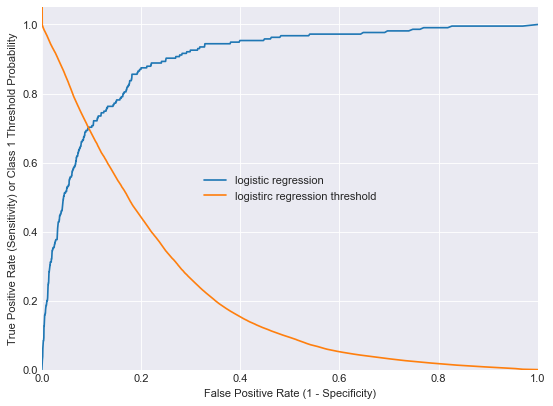

In [128]:
# plot LR and RF model ROC curves
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(fpr_lr, tpr_lr,label="logistic regression")
plt.plot(fpr_lr,thresholds_lr, label="logistirc regression threshold")
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend(loc="center")
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity) or Class 1 Threshold Probability')


array([0, 0, 0, ..., 0, 0, 0])

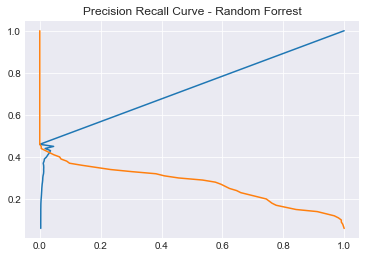

In [80]:
from sklearn.metrics import precision_recall_curve
y_score=rf.predict_proba(xtest_s)[:,1]
p,r,t=precision_recall_curve(ytest,y_score)

# adding last threshold of '1' to threshold list
t=np.vstack([t.reshape([-1,1]),1])

plt.plot(p,t)
plt.plot(r,t);
plt.title('Precision Recall Curve - Random Forrest');
y_pred

In [ ]:
from sklearn.metrics import precision_recall_curve
y_score=logreg.predict_proba(xtest_s)[:,1]
p,r,t=precision_recall_curve(ytest,y_score)

# adding last threshold of '1' to threshold list
t=np.vstack([t.reshape([-1,1]),1])

plt.plot(p,t)
plt.plot(r,t);
plt.title('Precision Recall Curve - Logistic Regression');
y_pred

In [96]:
#lr probabilities per category for first five samples
predicted_probs_lr = logreg.predict_proba(xtest_s).round(3)
predictions_lr = logreg.predict(xtest_s)

print("Logistic Regression predicted probabilities for first five samples in test set:\n",predicted_probs_lr[:5])
print("Logistic Regression predictions for first five samples in test set:\n",predictions_lr[:5])
y_test_lr_df = pd.DataFrame(
    np.concatenate((
        predicted_probs_lr,predictions_lr.reshape((predictions_lr.shape[0],-1)),
        ytest.reshape((ytest.shape[0],-1))),axis=1
    ),
    columns = ["class_0","class_1","predicted","actual"])

y_test_lr_df.head()

#lr probabilities per category for first five samples
predicted_probs_rf = rf.predict_proba(xtest).round(3)
predictions_rf = rf.predict(xtest)

print("RF predicted probabilities for first five samples in test set:\n",predicted_probs_rf[:5])
print("RF predictions for first five samples in test set:\n",predictions_rf[:5])
y_test_rf_df = pd.DataFrame(
    np.concatenate((
        predicted_probs_rf,predictions_rf.reshape((predictions_rf.shape[0],-1)),
        ytest.reshape((ytest.shape[0],-1))),axis=1
    ),
    columns = ["class_0","class_1","predicted","actual"])

y_test_rf_df.head()

Logistic Regression predicted probabilities for first five samples in test set:
 [[0.995 0.005]
 [0.791 0.209]
 [0.998 0.002]
 [0.863 0.137]
 [0.982 0.018]]
Logistic Regression predictions for first five samples in test set:
 [0 0 0 0 0]


/Users/justinblinder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


RF predicted probabilities for first five samples in test set:
 [[0.96 0.04]
 [1.   0.  ]
 [0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]]
RF predictions for first five samples in test set:
 [0 0 0 0 0]


/Users/justinblinder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


,class_0,class_1,predicted,actual
0,0.96,0.04,0.0,0.0
1,1.00,0.00,0.0,0.0
2,0.97,0.03,0.0,0.0
3,1.00,0.00,0.0,0.0
4,1.00,0.00,0.0,0.0


In [ ]:
Logistic Regression Thresholding

In [94]:
threshold=  .5
y_test_lr_df["predicted_A"] = (y_test_lr_df.class_1 > threshold).astype(float)
print(y_test_lr_df.head())
print("Confusion matrix at original 0.5 threshold:\n",metrics.confusion_matrix(y_test_lr_df.actual,
                                                                      y_test_lr_df.predicted),"\n")
print("Classification Report at original 0.5 threshold:\n", metrics.classification_report(y_test_lr_df.actual,
                                                                                          y_test_lr_df.predicted),"\n")
print(f"Confusion matrix at {threshold} threshold:\n",metrics.confusion_matrix(y_test_lr_df.actual,
                                                                      y_test_lr_df.predicted_A),"\n")
print(f"Classification Report at {threshold} threshold:\n", metrics.classification_report(y_test_lr_df.actual,
                                                                                 y_test_lr_df.predicted_A))

   class_0  class_1  predicted  actual  predicted_A
0    0.995    0.005        0.0     0.0          0.0
1    0.791    0.209        0.0     0.0          0.0
2    0.998    0.002        0.0     0.0          0.0
3    0.863    0.137        0.0     0.0          0.0
4    0.982    0.018        0.0     0.0          0.0
Confusion matrix at original 0.5 threshold:
 [[56056 11733]
 [   39   176]] 

Classification Report at original 0.5 threshold:
              precision    recall  f1-score   support

        0.0       1.00      0.83      0.90     67789
        1.0       0.01      0.82      0.03       215

avg / total       1.00      0.83      0.90     68004
 

Confusion matrix at 0.5 threshold:
 [[56065 11724]
 [   39   176]] 

Classification Report at 0.5 threshold:
              precision    recall  f1-score   support

        0.0       1.00      0.83      0.91     67789
        1.0       0.01      0.82      0.03       215

avg / total       1.00      0.83      0.90     68004



In [ ]:
Random Forest Thresholding

In [125]:
threshold=  .2
y_test_rf_df["predicted_A"] = (y_test_rf_df.class_1 > threshold).astype(float)
print(y_test_rf_df.head())
print("Confusion matrix at original 0.5 threshold:\n",metrics.confusion_matrix(y_test_rf_df.actual,
                                                                      y_test_rf_df.predicted),"\n")
print("Classification Report at original 0.5 threshold:\n", metrics.classification_report(y_test_rf_df.actual,
                                                                                          y_test_rf_df.predicted),"\n")
print(f"Confusion matrix at {threshold} threshold:\n",metrics.confusion_matrix(y_test_rf_df.actual,
                                                                      y_test_rf_df.predicted_A),"\n")
print(f"Classification Report at {threshold} threshold:\n", metrics.classification_report(y_test_rf_df.actual,
                                                                                 y_test_rf_df.predicted_A))

   class_0  class_1  predicted  actual  predicted_A
0    0.960    0.040      0.000   0.000        0.000
1    1.000    0.000      0.000   0.000        0.000
2    0.970    0.030      0.000   0.000        0.000
3    1.000    0.000      0.000   0.000        0.000
4    1.000    0.000      0.000   0.000        0.000
Confusion matrix at original 0.5 threshold:
 [[67752    37]
 [  128    87]] 

Classification Report at original 0.5 threshold:
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     67789
        1.0       0.70      0.40      0.51       215

avg / total       1.00      1.00      1.00     68004
 

Confusion matrix at 0.2 threshold:
 [[67538   251]
 [   34   181]] 

Classification Report at 0.2 threshold:
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     67789
        1.0       0.42      0.84      0.56       215

avg / total       1.00      1.00      1.00     68004



In [126]:
yprob = logreg.predict_proba(xtest_s)
yprobrf = rf.predict_proba(xtest_s)
print(metrics.roc_auc_score(ytest,yprob[:,1]))
print(metrics.roc_auc_score(ytest,yprobrf[:,1]))

0.8985167724611971
0.9892613091168321


# Grid Search

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

estimator = RandomForestClassifier()
param_grid = { 
        "n_estimators"      : [10,20,30,50,75,100,200,300],
        "max_features"      : ["auto", "log2"],
        "max_depth"         : [2,4,8,16,32,64,128],
        "min_samples_split" : [2,4,8,16,32,64,128]
        }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(xtrain, ytrain)

print(grid.best_score_ , grid.best_params_)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/justinblinder/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py", line 699, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/justinblinder/anaconda3/lib/python3.6/multiprocessing/pool.py", line 638, in get
    self.wait(timeout)
  File "/Users/justinblinder/anaconda3/lib/python3.6/multiprocessing/pool.py", line 635, in wait
    self._event.wait(timeout)
  File "/Users/justinblinder/anaconda3/lib/python3.6/threading.py", line 551, in wait
    signaled = self._cond.wait(timeout)
  File "/Users/justinblinder/anaconda3/lib/python3.6/threading.py", line 295, in wait
    waiter.acquire()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/justinblinder/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
 

TypeError: must be str, not list

In [212]:
# calculate AUC for lr and rf
print("LR model AUC: ",metrics.roc_auc_score(ytest, predicted_probs_lr[:,1]))


LR model AUC:  0.8713436217048058


In [ ]:
from sklearn.model_selection import GridSearchCV
solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
multi_class_options = ['ovr', 'multinomial']
class_weight_options = ['None', 'balanced']
c = [0.001, 0.01, 0.1, 1, 10, 100, 1000] 
param_grid = dict(solver = solver_options, multi_class = multi_class_options, C = c)
                  
clf = GridSearchCV(logreg(penalty='l2'), param_grid)grid = 
                  GridSearchCV(LogisticRegression, param_grid, cv=12, scoring ='accuracy')

                  

clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
GridSearchCV(cv=None,
             estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
               dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})



In [ ]:
from sklearn.model_selection import GridSearchCV

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(-2, 4, 1)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

logistic = linear_model.LogisticRegression()

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0,n_jobs=-1)
# Fit grid search
best_model = clf.fit(xtrain_s, ytrain)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

# Predict target vector
best_model.predict(xtest_s)

In [217]:
# Grid Search
from sklearn.model_selection import GridSearchCV

#build parameter grid
n_estimators_range = list(range(10,100,10))
max_features_options = ['sqrt', 'log2', None]
min_samples_split_range = list(np.linspace(0.01,.1,5))
min_impurity_decrease_range = list(np.linspace(0.01,.1,5))
tuned_parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}

param_grid = dict(n_estimators = n_estimators_range,
                  max_features = max_features_options,
                  min_samples_split = min_samples_split_range, 
                  min_impurity_decrease = min_impurity_decrease_range)

#fit grid
grid = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid, scoring='accuracy', n_jobs=-1)
grid.fit(xtrain,ytrain)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/justinblinder/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py", line 699, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/justinblinder/anaconda3/lib/python3.6/multiprocessing/pool.py", line 638, in get
    self.wait(timeout)
  File "/Users/justinblinder/anaconda3/lib/python3.6/multiprocessing/pool.py", line 635, in wait
    self._event.wait(timeout)
  File "/Users/justinblinder/anaconda3/lib/python3.6/threading.py", line 551, in wait
    signaled = self._cond.wait(timeout)
  File "/Users/justinblinder/anaconda3/lib/python3.6/threading.py", line 295, in wait
    waiter.acquire()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/justinblinder/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
 


KeyboardInterrupt

Process ForkPoolWorker-17:
Traceback (most recent call last):
  File "/Users/justinblinder/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/justinblinder/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Process ForkPoolWorker-23:
Process ForkPoolWorker-18:
Traceback (most recent call last):
  File "/Users/justinblinder/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Users/justinblinder/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/justinblinder/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/justinblinder/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)

In [ ]:
# OPTIMIZATION

In [138]:
A BETTER FOREST

,YearBuilt,NumBldgs,AssessLand,AssessTot,NumFloors,FloorCountBucket,BsmtCode,ResidFAR,BuiltFAR,YearAlter1,BldgFront,ProxCode,FacilFAR,ResArea,UnitsRes,YCoord,BldgDepth,BldgArea,Block,UnitsTotal,SanitDistrict,XCoord
1,1920,1,834300,10156950,10.000,3,0.000,5.400,8.330,1994,88.000,1.000,6.500,0,0,195989.000,195.000,163894,1,2,2.000,987838.000
2,0,15,0,0,0.000,0,5.000,0.000,0.000,0,0.000,0.000,0.000,0,0,196151.000,0.000,0,3,0,2.000,988568.000
5,0,4,0,0,0.000,0,5.000,0.000,0.000,0,0.000,0.000,0.000,0,0,196266.000,0.000,0,5,0,2.000,989346.000
7,0,15,0,0,0.000,0,5.000,0.000,0.000,0,0.000,0.000,0.000,0,0,196040.000,0.000,0,6,0,2.000,989745.000
13,0,1,679140,679140,0.000,0,5.000,0.000,0.000,0,0.000,0.000,0.000,0,0,195983.000,0.000,0,7,0,2.000,987276.000
14,0,1,182250,273600,3.000,1,5.000,0.000,0.000,0,0.000,0.000,0.000,0,0,196135.000,0.000,0,7,0,2.000,987382.000
15,0,0,1944,1944,0.000,0,5.000,0.000,0.000,0,0.000,0.000,0.000,0,0,195968.000,0.000,0,7,0,2.000,987436.000
16,1988,2,129600,351000,1.000,0,5.000,0.000,0.900,1988,69.000,0.000,0.000,0,0,195803.000,113.000,9585,7,1,2.000,987216.000
17,0,1,0,0,0.000,0,5.000,0.000,0.000,0,0.000,0.000,0.000,0,0,195957.000,0.000,0,12,0,2.000,989308.000
18,0,0,934650,934650,0.000,0,5.000,0.000,0.000,0,0.000,0.000,0.000,0,0,195967.000,0.000,0,16,0,2.000,987012.000


In [154]:
from imblearn.over_sampling import SMOTE 

# Subset data
#rf_features = np.append(rf_features,'ZoneCodeWasVacant')
rf_features = rf_features[:23]
df_pluto_subset_rf = df_pluto[rf_features]

# Get coefs
y_rf = df_pluto_subset_rf['ZoneCodeWasVacant'].astype(int)
X_rf = df_pluto_subset_rf[df_pluto_subset_rf.columns.difference(['ZoneCodeWasVacant'])]

# Create test train split
xtrain_rf, xtest_rf, ytrain_rf, ytest_rf= train_test_split(X_rf,y_rf)

# Smote train/ test data
sm_rf = SMOTE(random_state=42)
xtrain_rf, ytrain_rf = sm_rf.fit_sample(xtrain_rf,ytrain_rf)

# Scale train/test/holdout values values
scaler_rf = StandardScaler().fit(xtrain_rf)
xtrain_s_rf = scaler_rf.transform(xtrain_rf)
xtest_s_rf = pd.DataFrame(scaler_rf.transform(xtest_rf))

#df_pluto_holdout = pd.DataFrame(scaler.transform(df_pluto_holdout))

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfs_opt = RandomForestClassifier(n_estimators = 100)
rfs_opt.fit(xtrain_s_rf,ytrain_rf)
y_pred_opt = rfs_opt.predict(xtest_s_rf)

test_score = rfs_opt.score(xtest_s_rf,ytest_rf)
train_score = rfs_opt.score(xtrain_s_rf,ytrain_rf)

print(f'test: {test_score} train: {train_score}')


test: 0.9975295570848773 train: 1.0


NameError: name 'y_pred_rf' is not defined

In [156]:
print("Test set accuracy: ", accuracy_score(ytest_rf,y_pred_opt))
print("Classification Report:\n", metrics.classification_report(ytest_rf,y_pred_opt))

Test set accuracy:  0.9975295570848773
Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     67772
          1       0.67      0.55      0.60       232

avg / total       1.00      1.00      1.00     68004



In [ ]:
A BETTER LOG

In [157]:
filter_cols

array(['AssessLand', 'ExemptLand', 'LotArea', 'ComArea',
       'FloorCountBucket', 'BldgArea', 'YCoord', 'AssessTot',
       'Cat_PolicePrct_69.0', 'ExemptTot', 'LotFront',
       'Cat_ZipCode_11236.0', 'Cat_PolicePrct_75.0', 'YearBuilt',
       'Cat_CD_306', 'Cat_ZipCode_11232.0', 'BuiltFAR', 'ResArea',
       'Cat_PolicePrct_78.0', 'Cat_CD_318'], dtype=object)

In [158]:
from imblearn.over_sampling import SMOTE 

# Subset data
#filter_cols = np.append(filter_cols,'ZoneCodeWasVacant')
log_features = filter_cols
df_pluto_subset_log = df_pluto[log_features]

# Get coefs
y_log = df_pluto_subset_log['ZoneCodeWasVacant'].astype(int)
X_log = df_pluto_subset_log[df_pluto_subset_log.columns.difference(['ZoneCodeWasVacant'])]

# Create test train split
xtrain_log, xtest_log, ytrain_log, ytest_log= train_test_split(X_log,y_log)

# Smote train/ test data
sm_log = SMOTE(random_state=42)
xtrain_log, ytrain_log = sm_log.fit_sample(xtrain_log,ytrain_log)

# Scale train/test/holdout values values
scaler_log = StandardScaler().fit(xtrain_log)
xtrain_s_log = scaler_log.transform(xtrain_log)
xtest_s_log = pd.DataFrame(scaler_log.transform(xtest_log))
#df_pluto_holdout = pd.DataFrame(scaler.transform(df_pluto_holdout))

In [160]:
# Fit, score and save logistic model
logreg_opt = LogisticRegression(C=1e9)
logreg_opt.fit(xtrain_s_log, ytrain_log)
outcome_pred_class_log = logreg_opt.predict(X_log)
#pickle.dump(logreg, open('../data/pkl/logreg-alldata-final-limit_coefs.pkl', 'wb'))
test_score_log = logreg_opt.score(xtest_s_log,ytest_log)
train_score_log = logreg_opt.score(xtrain_s_log,ytrain_log)

print(f'test: {test_score_log} train: {train_score_log}')

y_pred_log = logreg_opt.predict(xtest_s_log)
print(classification_report(ytest_log,y_pred_log,target_names=["Vacant Remains","Vacant Changes"]))


test: 0.7275454385036174 train: 0.7706588298944986
                precision    recall  f1-score   support

Vacant Remains       1.00      0.73      0.84     67806
Vacant Changes       0.01      0.71      0.01       198

   avg / total       1.00      0.73      0.84     68004



In [8]:
#plot
boot_sqrt = []
boot_log2 = []
boot_none = []
noboot_sqrt = []
noboot_log2 = []
noboot_none = []
n_range = range(1,100,10)

for n in n_range:
    cm_boot_sqrt = RandomForestClassifier(n_estimators=n, max_features='sqrt', n_jobs=-1, bootstrap=True)
    cm_boot_log2 = RandomForestClassifier(n_estimators=n, max_features='log2', n_jobs=-1, bootstrap=True)
    cm_boot_none = RandomForestClassifier(n_estimators=n, max_features= None, n_jobs=-1, bootstrap=True)
    cm_noboot_sqrt = RandomForestClassifier(n_estimators=n, max_features='sqrt', n_jobs=-1, bootstrap=False)
    cm_noboot_log2 = RandomForestClassifier(n_estimators=n, max_features='log2', n_jobs=-1, bootstrap=False)
    cm_noboot_none = RandomForestClassifier(n_estimators=n, max_features= None, n_jobs=-1, bootstrap=False)
    
    cm_boot_sqrt.fit(xtrain_s, ytrain)
    cm_boot_log2.fit(xtrain_s, ytrain)
    cm_boot_none.fit(xtrain_s, ytrain)
    cm_noboot_sqrt.fit(xtrain_s, ytrain)
    cm_noboot_log2.fit(xtrain_s, ytrain)
    cm_noboot_none.fit(xtrain_s, ytrain)
    
    boot_sqrt.append(cm_boot_sqrt.score(xtest_s, ytest))
    boot_log2.append(cm_boot_log2.score(xtest_s, ytest))
    boot_none.append(cm_boot_none.score(xtest_s, ytest))
    noboot_sqrt.append(cm_noboot_sqrt.score(xtest_s, ytest))
    noboot_log2.append(cm_noboot_log2.score(xtest_s, ytest))
    noboot_none.append(cm_noboot_none.score(xtest_s, ytest))

plt.plot(n_range, boot_sqrt, label='with bootstrap, sqrt features')
plt.plot(n_range, boot_log2, label='with bootstrap, log2 features')
plt.plot(n_range, boot_none, label='with bootstrap, all features')
plt.plot(n_range, noboot_sqrt, label='without bootstrap, sqrt features')
plt.plot(n_range, noboot_log2, label='without bootstrap, log2 features')
plt.plot(n_range, noboot_none, label='without bootstrap, all features')
plt.title('Random Forest Optimization')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend();

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/justinblinder/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-9951f5986bc3>", line 23, in <module>
    cm_noboot_none.fit(xtrain_s, ytrain)
  File "/Users/justinblinder/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py", line 328, in fit
    for i, t in enumerate(trees))
  File "/Users/justinblinder/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py", line 789, in __call__
    self.retrieve()
  File "/Users/justinblinder/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py", line 699, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/justinblinder/anaconda3/lib/python3.6/multiprocessing/pool.py", line 638, in get
    self.wait(timeout)
  File "/Users/justinblinder/anaconda3/lib/python3.6/multiprocessing/pool.py", line 63

KeyboardInterrupt: 